## 뉴스 요약봇 만들기

### 텍스트 요약(Text Summarization)이란?

텍스트 요약(Text Summarization)이란 위 그림과 같이 긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Summary) 문장들로 변환하는 것을 말한다. 예를 들어 상대적으로 큰 텍스트인 뉴스 기사로 작은 텍스트인 뉴스 제목을 만들어내는 것이 텍스트 요약의 대표적인 예라고 할 수 있다.

이때 중요한 것은 요약 전후에 정보 손실 발생이 최소화되어야 한다는 점이다. 이것은 정보를 압축하는 과정과 같다. 비록 텍스트의 길이가 크게 줄어들었지만, 요약문은 문서 원문이 담고 있는 정보를 최대한 보존하고 있어야 한다. 이것은 원문의 길이가 길수록 만만치 않은 어려운 작업이 된다. 사람이 이 작업을 수행한다 하더라도 긴 문장을 정확하게 읽고 이해한 후, 그 의미를 손상하지 않는 짧은 다른 표현으로 원문을 번역해 내야 하는 것이다.

그렇게 요약 문장을 만들어 내려면 어떤 방법을 사용하면 좋을까? 여기서 텍스트 요약은 크게 추출적 요약(Extractive Summarization)과 추상적 요약(Abstractive Summarization)의 두 가지 접근으로 나누어볼 수 있다.

### 추출적 요약(Extractive Summarization)

첫 번째 방식인 추출적 요약은 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식이다. 가령, 10개의 문장으로 구성된 텍스트가 있다면, 그중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식이다. 그런데 꺼내온 3개의 문장이 원문에서 중요한 문장일 수는 있어도, 3개의 문장의 연결이 자연스럽지 않을 수는 있다. 결과로 나온 문장들 간의 호응이 자연스럽지 않을 수 있다는 것이다. 딥 러닝보다는 주로 전통적인 머신 러닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘을 사용해서 이 방법을 사용한다고 한다. 가장 대표적인 것이 네이버 뉴스 서비스에 있는 요약봇 기능이다.

### 추상적 요약(Abstractive Summarization)

두 번째 방식인 추상적 요약은 추출적 요약보다 좀 더 흥미로운 접근을 사용한다. 원문으로부터 내용이 요약된 새로운 문장을 생성해내는 것이다. 여기서 새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다는 것을 의미한다. 자연어 처리 분야 중 자연어 생성(Natural Language Generation, NLG)의 영역인 셈이다. 반면, 추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 볼 수 있을 것이다.

자연어 생성하면 떠오르는 신경망은 RNN이다. 그렇다면, RNN으로 추상적 요약 방식을 구현한다고 하면 문제가 전혀 없을까? 그저 RNN을 이용해 Language Generation을 한다고 해서 긴 문장을 읽고 나서 요약문을 뚝딱 만들어내긴 어렵다. ML 분야의 선구자라고 할 수 있는 기업 '구글(Google)'은 자신들의 서비스에 어떤 방식으로 텍스트 요약을 시도했을까? 2016년의 아래 기사에 따르면, 구글은 뉴스 기사 내용으로부터 자동으로 뉴스 제목을 뽑아내는 텍스트 요약 모델을 구현했었다고 한다. 어떻게 구현했는지는 [여기][1]를 참고하면 된다.

[1]:https://zdnet.co.kr/view/?no=20160905114833&from=Mobile

### seq2seq 모델

우리는 seq2seq 모델을 통해서 Abstractive summarization 방식의 텍스트 요약기를 만들어볼 것이다. seq2seq은 두 개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해 내는 자연어 생성 모델이다. 주로 뉴럴 기계번역에 사용되는 이 모델이 텍스트 요약에도 사용될 수 있을지 의문이 들겠지만, 원문을 요약문으로 번역한다고 생각한다면 전혀 무리가 없다.

seq2seq 개요
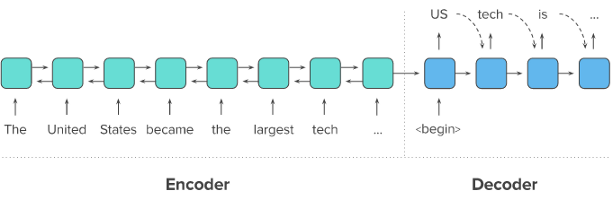

원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환한다. 이 벡터를 문맥 정보를 가지고 있는 벡터라고 하여 컨텍스트 벡터(context vector)라고 한다. 두 번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성한다.

LSTM과 컨텍스트 벡터

우리는 seq2seq를 구현할 때, 인코더/디코더로 바닐라 RNN이 아니라 LSTM을 사용할 것이다.

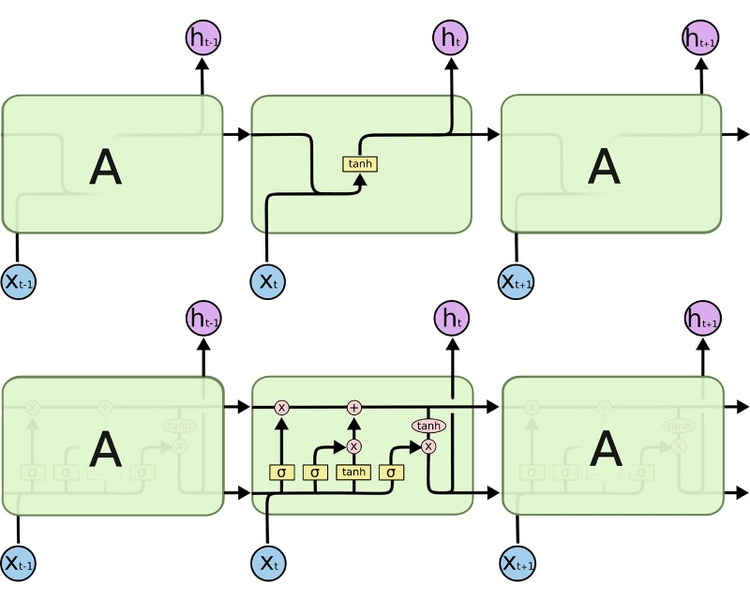

LSTM이 바닐라 RNN과 다른 점은 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다는 점이다. 다시 말해, 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state h와 cell state c 두 개의 값 모두 존재해야 한다는 뜻이다.

시작 토큰과 종료 토큰

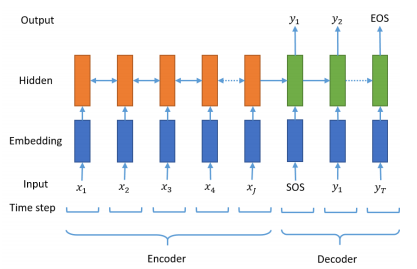

시작 토큰 SOS와 종료 토큰 EOS는 각각 start of a sequence와 end of a sequence를 나타낸다.

seq2seq 구조에서 디코더는 시작 토큰 SOS가 입력되면, 각 시점마다 단어를 생성하고 이 과정을 종료 토큰 EOS를 예측하는 순간까지 멈추지 않는다. 다시 말해 훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야 하는지 알려줄 필요가 있겠다.

어텐션 메커니즘을 통한 새로운 컨텍스트 벡터 사용하기

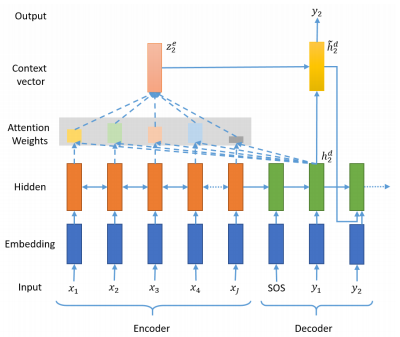

어텐션 메커니즘은 기존의 컨텍스트 벡터보다 인코더의 정보를 적극적으로 활용하여 성능을 끌어올린다.

우리는 기존에 배운 seq2seq를 수정하고, 새로운 모듈을 붙여 모델의 성능을 높여볼 수 있다. 기존의 seq2seq는 인코더의 마지막 time step의 hidden state를 컨텍스트 벡터로 사용했다. 하지만 RNN 계열의 인공 신경망(바닐라 RNN, LSTM, GRU)의 한계로 인해 이 컨텍스트 정보에는 이미 입력 시퀀스의 많은 정보가 손실이 된 상태가 된다.

어텐션 메커니즘(Attention Mechanism)은 이와 달리, 인코더의 모든 step의 hidden state의 정보가 컨텍스트 벡터에 전부 반영되도록 하는 것이다. 하지만 인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아니라, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식이다.

위 그림의 예로 들자면, seq2seq 모델이라면 디코더로 전달되는 인코더의 컨텍스트 벡터는 인코더의 마지막 스텝의 hidden state인 h5가 되겠지만, 어텐션 메커니즘이 적용된 seq2seq인 Attentional seq2seq이라면 인코더의 컨텍스트 벡터는 예를 들어 0.2h1+0.3h2 +0.1h3+0.15h4+0.25h5가 될 수도 있는 것이다.

여기서 주의해야 할 것은, 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 디코더의 현재 스텝이 어디냐에 따라 계속 달라진다는 점이다. 즉, 디코더의 현재 문장 생성 부위가 주어부인지 술어부인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다는 것이다. 이와 달리, 기본적인 seq2seq 모델에서 컨텍스트 벡터는 디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정값을 가진다.

이렇게 디코더의 현재 스텝에 따라 동적으로 달라지는 인코더의 컨텍스트 벡터를 사용해서 현재의 예측에 활용하면, 디코더가 좀 더 정확한 예측을 할 수 있게 된다. 이러한 Attention 기법은 seq2seq을 비롯하여 향후 다양한 딥러닝 분야를 획기적으로 발전시킨 핵심 개념이 된다. 특히 자연어처리 분야에서도 마찬가지다.

## 프로젝트: 뉴스기사 요약해보기

데이터셋에 대한 추상적 요약과 추출적 요약을 해보자

In [1]:
# mkdir -p ~/aiffel/news_summarization/data

In [2]:
# 터미널을 열어 위와 같이 작업환경을 구성한다.

In [3]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('완료')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


완료


라이브러리 import하기

Step 1. 데이터 수집하기

In [4]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

데이터를 다운로드한다.

In [5]:
data.sample(10)

,headlines,text
83892,0001 car number sells for record Ã¢ÂÂ¹16L in ...,"The ""0001"" car registration number sold for Ã¢..."
17979,Australian who returned to tennis from cricket...,"Australian tennis player Ashleigh Barty, who p..."
83678,Kerala priest missing for 4 days found dead in...,A 33-year-old priest from Kerala who had been ...
78960,Fire breaks out in Delhi's Lok Nayak Bhawan,A major fire broke out on Monday in Delhi's Lo...
56459,4 Russians held for flying drone over Jagannat...,Four Russians were detained on Thursday for fl...
4213,Police unable to protect their own: Son of con...,The son of the constable who was killed in Utt...
85993,IIT-Delhi best ranked Indian institution in wo...,The Indian Institute of Technology (IIT) Delhi...
39565,High alert in UP after LeT letter threatens bo...,Uttar Pradesh Police has sounded a high alert ...
54914,Pakistan media calls Jadhav's mother 'qatil ki...,Former Indian Navy officer Kulbhushan Jadhav's...
30836,"SC asks Jaypee to deposit Ã¢ÂÂ¹1,000 crore to...",The Supreme Court has asked real-estate firm J...


이 데이터는 기사의 본문에 해당되는 text와 headlines 두 가지 열로 구성되어져 있다.

Step 2. 데이터 전처리하기 (추상적 요약)

실습에서 사용된 전처리를 참고하여 각자 필요하다고 생각하는 전처리를 추가 사용하여 텍스트를 정규화 또는 정제해 보자. 만약, 불용어 제거를 선택한다면 상대적으로 길이가 짧은 요약 데이터에 대해서도 불용어를 제거하는 것이 좋을지 고민해 보자.

데이터를 불러왔으니 전처리를 진행해 본다. 빈칸으로 존재하는 null 데이터, 의미는 같지만 다른 식으로 작성된 글 같은 중복 항목과 같은 학습할 때 방해가 되는 데이터를 먼저 솎아낸다.

● 중복 샘플과 NULL 값이 존재하는 샘플 제거

In [6]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [7]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


데이터프레임의 drop_duplicates()를 사용하면, 손쉽게 중복 샘플을 제거할 수 있다.

중복이 제거되면서 샘플 수가 98,360개로 줄어들었다. 그런데 만약 데이터 Null 값을 가지는 샘플이 있었다면, drop_duplicates()가 중복된 Null들을 지워주기는 하겠지만, 여전히 Null 값 한 개가 어딘가 남아있을 수 있다. 데이터에 Null 값이 남아있는지 보겠다.

데이터프레임에 Null 값이 있는지 확인하는 방법은 .isnull().sum()을 사용하면 알아볼 수 있다.

In [8]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


Null 값은 없는 것으로 확인되었다. 만약 null값이 있는 관계로 데이터프레임에서 Null을 제거할 때는 dropna() 함수를 사용하면 된다.

# data.dropna(axis=0, inplace=True)
# print('전체 샘플수 :', (len(data)))

● 텍스트 정규화와 불용어 제거

살아남은 샘플들에는 수많은 단어들이 있다. 그런데 사실 그 단어들 중에서는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있다.

예를 들어서 it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현이다. 이런 경우 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는 기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법이다.

이러한 방법론을 텍스트 처리에서는 텍스트 정규화(text normalization) 라고 한다.

여기서는 텍스트 정규화를 위한 사전(dictionary)을 아래와 같이 구성할 것이다. 이 사전은 [여기][1]에서 참고하여 만들었다.

[1]:https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


정규화 준비를 완료하였다.

일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들이 존재한다. 이를 불용어(stopwords)라고 부른다. 때로는 불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법일 수 있다. 여기서는 NLTK에서 제공하는 불용어 리스트를 참조해, 샘플에서 불용어를 제거한다.

In [10]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179개라는 것을 볼 수 있다. 이를 사용하여 불용어를 제거한다. 이 작업 외에도 모든 영어 문자는 소문자로 만들고, 섞여있는 html 태그를 제거하고, 정규 표현식을 통해 각종 특수문자를 제거해서 정말 필요한 내용만 잘 학습할 수 있도록 처리할 것이다.

In [11]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('완료')

완료


함수의 하단을 보면, NLTK를 이용해 불용어를 제거하는 파트가 있는데, 이는 text 전처리 시에서만 호출하고 이미 상대적으로 문장 길이가 짧은 headlines 전처리할 때는 호출하지 않을 것이다. Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 이 불용어들이 headlines에는 남아 있는 게 더 좋다. 이 처리를 위해서 함수의 인자로 remove_stopwords를 추가하고, if문을 추가했다.

In [122]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


전처리 전, 후의 결과를 확인하기 위해서 임의의 text와 summary를 만들어 함수를 호출해 보니 기본적으로 모든 알파벳이 소문자로 변환되고, <br />과 같은 html 태그가 제거되었다. (or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거된 것도 확인할 수 있다. 또한 특수문자가 제거되면서 영어만 남았다.

함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리를 수행한다. 이때, Text의 경우에는 불용어를 제거하고, headlines의 경우에는 불용어를 제거하지 않을 것이므로 따로 호출해서 진행해야 한다. 먼저 Text를 전처리하고, 결과를 확인하기 위해서 상위 5개의 줄을 출력해본다.

In [13]:
clean_text = []
# 전체 text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

이제 headlines 함수를 호출해 줄 때는, 불용어 제거를 수행하지 않는다는 의미에서 두 번째 인자로 False를 넣어준다.

In [14]:
clean_headlines = []
# 전체 headlines 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


이렇게 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해보는 것이 좋다. 정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있다. 이렇게 되면 샘플 자체가 빈 값을 가지게 된다.

보다 쉽게 확인하기 위해 데이터들을 데이터프레임에 재저장한다. 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체한다.

In [15]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('완료')

완료


이전과 같이 .isnull().sum()을 사용해서 Null 값이 생겼는지 확인해본다.

In [16]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

Null 값이 존재하지 않는다. 만약 Null 값이 생겼다고 가정해보자. 이는 원래는 단어가 있었는데, 정제 과정에서 모든 단어가 제거되어 빈 샘플이 생겼다는 의미이다. 이 샘플들은 dropna() 함수를 사용하여 제거한다.

# data.dropna(axis=0, inplace=True)
# print('전체 샘플수 :', (len(data)))

학습을 진행하기 위해서는 학습에 사용할 데이터의 크기를 결정하고, 문장의 시작과 끝을 표시해 줘야 한다.

● 샘플의 최대 길이 정하기

필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 이제 훈련에 사용할 샘플의 최대 길이를 정해줄 차례다.

text와 headlines의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해본다.

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.299532330215534


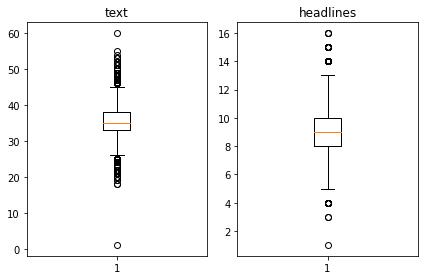

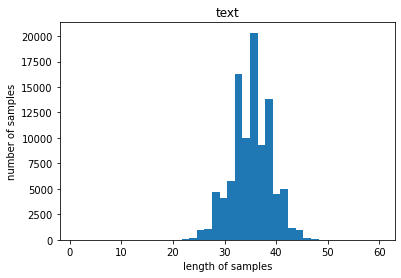

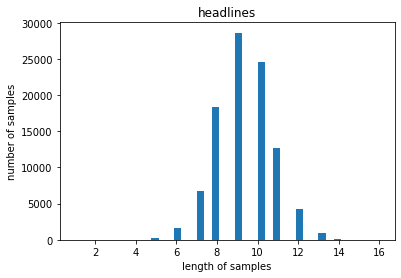

In [17]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

이로부터 text의 최대 길이와 headlines의 적절한 최대 길이를 임의로 정해본다.

In [18]:
text_max_len = 50
headlines_max_len = 8
print('완료')

완료


text의 최대 길이와 headlines의 적절한 최대 길이를 각각 50과 8로 정했는데 이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인하는 편이 객관적으로 길이를 결정하는 데 도움이 될 것이다. 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수를 만들어서 좀 더 정확하게 판단해보겠다.

In [19]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('완료')

완료


이렇게 만든 함수를 Text와 headlines에 적용해 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 볼 수 있다.

In [20]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.9998576657177715
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.2755693371289142


각각 50과 8로 패딩을 하게 되면 해당 길이보다 긴 샘플들은 내용이 잘리게 된다.

정해진 길이에 맞춰 자르는 것이 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제하겠다..

In [21]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 27105


● 시작 토큰과 종료 토큰 추가하기

디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고, 종료 토큰을 예측한 순간에 문장 생성을 멈추는 것이라고 앞서 언급했다.

seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있다. 이번 실습에서는 시작 토큰은 sostoken, 종료 토큰은 eostoken이라 임의로 명명하고 앞, 뒤로 추가한다. 디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 decoder_input, 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 decoder_target이라고 이름을 정한다. 두 개의 문장 모두 headlines 열로부터 만들 것이다.

In [22]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
19,odisha cm patnaik controls mining mafia union ...,union minister dharmendra pradhan wednesday cl...,sostoken odisha cm patnaik controls mining maf...,odisha cm patnaik controls mining mafia union ...
21,isro unveils bengaluru centre for manned space...,indian space research organisation wednesday u...,sostoken isro unveils bengaluru centre for man...,isro unveils bengaluru centre for manned space...
22,killed injured in saudi arabia floods,least people killed others injured saudi arabi...,sostoken killed injured in saudi arabia floods,killed injured in saudi arabia floods eostoken
29,seat cushions from missing plane carrying foot...,investigators searching lost plane carrying ar...,sostoken seat cushions from missing plane carr...,seat cushions from missing plane carrying foot...
36,agustawestland scam accused rajiv saxena extra...,agustawestland chopper scam co accused rajiv s...,sostoken agustawestland scam accused rajiv sax...,agustawestland scam accused rajiv saxena extra...


앞 뒤로 토큰이 붙었다. 이제 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장하겠다.

In [23]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('완료')

완료


이제 훈련 데이터와 테스트 데이터를 분리한다.

훈련 데이터와 테스트 데이터를 분리하는 방법은 분리 패키지를 사용하는 방법, 또는 직접 코딩을 통해서 분리하는 방법 등 여러 가지 방법이 있을 텐데 여기서는 직접 해본다. 우선, encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어준다.

In [24]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[22600  2486 11250 ...  6439   416 10522]


이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 된다.

In [25]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('완료')

완료


이제 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리해 준다. 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의한다.

In [26]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 5421


이렇게 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분한다. :표시의 위치에 주의한다.

In [27]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 21684
훈련 레이블의 개수 : 21684
테스트 데이터의 개수 : 5421
테스트 레이블의 개수 : 5421


훈련 데이터와 테스트 데이터가 잘 분리된 것을 볼 수 있다.

● 단어 집합(vocabulary) 만들기 및 정수 인코딩

이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 한다. 이를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요하다. 이 과정을 단어 집합(vocabulary) 을 만든다고 표현한다. 훈련 데이터에 대해서 단어 집합을 만들어보겠다. 우선, 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만든다.

Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있다.

In [28]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('완료')

완료


단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었다. 현재 생성된 단어 집합은 src_tokenizer.word_index에 저장되어 있다. 하지만 이렇게 만든 단어 집합에 있는 모든 단어를 사용하는 것이 아니라, 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행할 것이다.

등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해본다.

src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻을 수 있다.

In [29]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 42451
등장 빈도가 6번 이하인 희귀 단어의 수: 30739
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11712
단어 집합에서 희귀 단어의 비율: 72.41054392122682
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.314417413774294


등장 빈도가 6번 이하인 희귀 단어들은 단어집합에서 무려 70% 이상을 차지한다. 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 8%대이다.

그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 한다. 위에서 이를 제외한 단어 집합의 크기를 11,792개로 계산했는데, 이와 비슷한 값으로 어림잡아 단어 집합의 크기를 12,000으로 제한한다. 토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있다.

In [30]:
src_vocab = 12000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 12,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('완료')

완료


단어 집합의 크기를 12,000개로 제한했다.

texts_to_sequences()는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행한다. 현재 단어 집합의 크기를 12,000으로 제한했으므로, 12,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않는다.

In [31]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[11, 7793, 2330, 1381, 5998, 1463, 51, 604, 30, 134, 2787, 2731, 8700, 1096, 2, 9260, 2079, 64, 711, 1464, 1341, 3197, 2440, 5794, 3794, 552, 2199, 2470, 753], [1139, 538, 216, 5795, 23, 5598, 9261, 100, 20, 77, 457, 1766, 1862, 5397, 170, 86, 5398, 10737, 1766, 159, 132, 2259, 609, 2033, 1881, 1316, 1766, 1422, 1882, 1317, 7104, 2788, 3042, 167, 8701, 2732, 3323], [370, 3043, 2080, 4084, 1448, 9262, 2109, 1, 5063, 4393, 3795, 3696, 3795, 52, 1449, 46, 700, 3245, 3087, 1658, 1659, 6773, 4175, 4393, 2260, 15, 2689, 2366, 1863, 2401, 486, 5999]]


텍스트 데이터가 아니라 정수가 나오고 있는 것을 확인할 수 있다.

headlines 데이터에 대해서도 동일한 작업을 수행한다. 케라스의 토크나이저를 사용하여 decoder_input_train을 입력으로 전체 단어 집합과 각 단어에 대한 빈도수를 계산한다.

In [32]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('완료')

완료


단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었다. 이는 tar_tokenizer.word_index에 저장되어 있다. tar_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻어서, 등장 빈도수가 5회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해본다.

In [33]:
threshold = 5
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18929
등장 빈도가 4번 이하인 희귀 단어의 수: 13547
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5382
단어 집합에서 희귀 단어의 비율: 71.5674362089915
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.209171359613839


등장 빈도가 4회 이하인 희귀 단어들은 단어 집합에서 약 71%를 차지하고 있다. 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 12%대이다. 아까 했던 것과 동일하게 이 단어들은 모두 제거한다. 어림잡아 5,400을 단어 집합의 크기로 제한한다.

In [34]:
tar_vocab = 5400
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 3690, 581, 10, 2379, 710, 11, 135], [1, 68, 274, 774, 9], [1, 3691, 11, 636, 2219], [1, 128, 162, 136, 711, 193, 148], [1, 3692, 125, 1155, 256, 11, 5384, 16, 2783]]
target
decoder  [[3690, 581, 10, 2379, 710, 11, 135, 2], [68, 274, 774, 9, 2], [3691, 11, 636, 2219, 2], [128, 162, 136, 711, 193, 148, 2], [3692, 125, 1155, 256, 11, 5384, 16, 2783, 2]]


정상적으로 정수 인코딩 작업이 끝났다. 현재 decoder_input_train과 decoder_target_train에는 더 이상 숫자 5,400이 넘는 숫자들은 존재하지 않는다. 하지만 다음작업인 패딩 하기로 넘어가기 전에 한 가지 점검해야 할 것이 있다.

전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있다. 이 현상은 길이가 상대적으로 길었던 원문(Text)의 경우에는 문제가 별로 없겠지만, 애초에 평균 길이가 9밖에 되지 않았던 headlines의 경우에는 이 현상이 굉장히 두드러졌을 가능성이 높다.

요약문에서 길이가 0이 된 샘플들의 인덱스를 받아오겠다. 여기서 주의할 점은 요약문인 decoder_input에는 sostoken 또는 decoder_target에는 eostoken이 추가된 상태이고, 이 두 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플 수와 동일하게 매우 높으므로 단어 집합 제한에도 삭제되지 않는다. 그래서 이제 길이가 0이 된 요약문의 실제 길이는 1로 나올 것이다. 길이 0이 된 decoder_input에는 sostoken, decoder_target에는 eostoken만 남아 있을 것이기 때문이다.

훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장해보겠다. 이 샘플들은 모두 삭제할 것이다.

In [35]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 21683
훈련 레이블의 개수 : 21683
테스트 데이터의 개수 : 5421
테스트 레이블의 개수 : 5421


훈련 데이터와 테스트 데이터 모두 일정량의 샘플들이 제거된 것을 확인할 수 있다.

● 패딩하기

텍스트 시퀀스를 정수 시퀀스로 변환했다면, 이제 서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 해주어야 한다. 아까 정해두었던 최대 길이로 패딩을 할 것이다. 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춰본다.

In [36]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='pre')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='pre')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='pre')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='pre')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='pre')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='pre')
print('완료')

완료


'post'대신 'pre'로 패딩처리하였다. 'pre'가 'post'보다 성능이 좋다는 것은 이미 배운바 있다. 

※ 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적이다.

패딩처리를 함으로써 학습에 필요한 데이터 전처리가 모두 끝났다.

● 모델 설계하기

함수형 API를 이용해서 인코더를 설계해 본다.

In [37]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

임베딩 벡터의 차원은 128로 정의하고, hidden state의 크기를 256으로 정의한다.

hidden state : LSTM에서 얼만큼의 수용력(capacity)를 가질지를 정하는 파라미터이다. 이 파라미터는 LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수라고 이해하면 된다. 다른 신경망과 마찬가지로, 무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니다.

인코더의 LSTM은 총 3개의 층으로 구성해서 모델의 복잡도를 높였다. hidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면, 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있다. 3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줘야한다.

또한 LSTM은 dropout 뿐 아니라 recurrent dropout까지 사용한다. 일반적인 dropout은 레이어의 weight를 랜덤으로 생략하여 모델의 과적합(overfitting)을 해결해주는 방법이다.

반면 recurrent dropout은 dropout을 레이어가 아닌 time step마다 해주는 방식이다. 즉 time step의 입력을 랜덤으로 생략해 주는 것이다. recurrent dropout은 일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다고 한다.

아래 그림은 일반적인 dropout과, dropout과 recurrent dropout을 동시에 사용한 것을 시각적으로 표현한 것이다. 색이 있는 화살표는 dropout을 나타낸 것이다.(색이 다른 것은 다른 dropout mask를 사용했다는 표시이다.) 현재 사용한 LSTM은 dropout과 recurrent dropout을 모두 사용했으니 오른쪽 그림과 같은 형태이다. 참고로 dropout과 recurrent dropout을 모두 사용한 것을 Variational Dropout이라고도 한다.

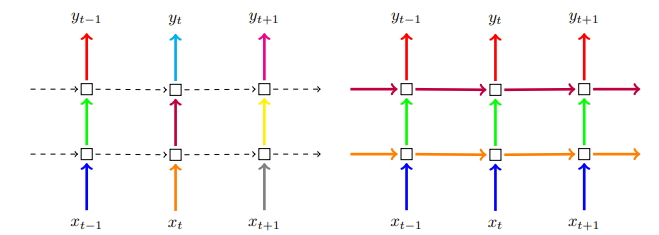

참고로 recurrent dropout을 사용하면 아래와 같은 경고문이 뜬다.

WARNING:tensorflow:Layer lstm_15 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU

recurrent dropout을 사용할 시 cuDNN을 사용할 수 없어서 recurrent dropout을 사용하지 않을 때보다 학습 시간이 오래 걸린다.

다음으로 디코더를 설계한다.

In [38]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일하다. 하지만 LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 한다.

이제 디코더의 출력층을 설계하겠다.

In [39]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1536000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

디코더의 출력층에서는 headlines의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀어야 한다. 그렇기 때문에 Dense의 인자로 tar_vocab을 주고, 활성화 함수로 소프트맥스 함수를 사용한다.

지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq이다. 그런데 디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 있다. 바로 어텐션 메커니즘이다.

Step 3. 어텐션 메커니즘 사용하기 (추상적 요약)

### 어텐션 메커니즘이란?

어텐션 메커니즘을 수행하는 어텐션 함수를 설계하는 것은 또 다른 새로운 신경망을 설계해야 한다는 뜻이다. 여기서는 TensorFlow에 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하는지 배워본다. 여기서 사용하는 어텐션 함수는 Bahdanau 스타일의 어텐션이다.(텐서플로우 홈페이지를 참고)

아래와 같이 어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정해 본다.

In [40]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1536000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

위의 코드는 인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용하고, 어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동하고 있다.

● 모델 훈련하기

설계한 모델을 이용하여 훈련을 진행한다.

In [41]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
85/85 [==============================] - 63s 648ms/step - loss: 6.3203 - val_loss: 5.8026
Epoch 2/50
85/85 [==============================] - 54s 640ms/step - loss: 5.9085 - val_loss: 5.6435
Epoch 3/50
85/85 [==============================] - 55s 643ms/step - loss: 5.7753 - val_loss: 5.5714
Epoch 4/50
85/85 [==============================] - 55s 642ms/step - loss: 5.6945 - val_loss: 5.5247
Epoch 5/50
85/85 [==============================] - 54s 639ms/step - loss: 5.6325 - val_loss: 5.4929
Epoch 6/50
85/85 [==============================] - 54s 641ms/step - loss: 5.5744 - val_loss: 5.4674
Epoch 7/50
85/85 [==============================] - 54s 637ms/step - loss: 5.5272 - val_loss: 5.7430
Epoch 8/50
85/85 [==============================] - 55s 643ms/step - loss: 5.4797 - val_loss: 5.4110
Epoch 9/50
85/85 [==============================] - 54s 639ms/step - loss: 5.4228 - val_loss: 5.3816
Epoch 10/50
85/85 [==============================] - 54s 635ms/step - loss: 5.3617 - val_lo

EarlyStopping: '조기 종료'를 뜻하며 특정 조건이 충족되면 훈련을 멈추는 역할을 한다.

es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

위 코드에서는 val_loss(검증 데이터의 손실)을 관찰하다가, 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 2회(patience=2) 관측되면 학습을 멈추도록 설정되어 있다. EarlyStopping이 작동한다면 epochs가 아무리 크게 설정되어 있어도 모델 훈련을 최적점에서 멈출 수 있다.

이제 훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화 해보겠다.

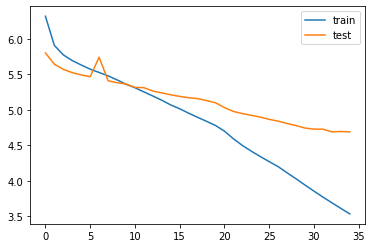

In [125]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Epoch 7/50에서 val_loss가 잠시 올라가는 모습을 보였지만, 이후에는 다시 내림세를 보이는 것을 확인할 수 있다.

● 인퍼런스 모델 구현하기

테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개의 사전을 아래와 같이 미리 준비해 둔다.

In [126]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('완료')

완료


seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 한다.

훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로, 인코더와 디코더를 엮은 통짜 모델 하나만 준비했다.

그러나 정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문에 부득이하게 인퍼런스를 위한 모델 설계를 별도로 해주어야 한다. 이때는 인코더 모델과 디코더 모델을 분리해서 설계한다.

In [127]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('완료')

완료


어텐션 메커니즘을 사용하는 출력층을 설계한다.

In [128]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('완료')

완료


인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만든다.

In [129]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('완료')

완료


● 모델 테스트하기

테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편하다. 주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들어본다. 함수를 만들 때, Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고 Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외하도록 만들 것이다.

In [130]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('완료')

완료


Step 4. 실제 결과와 요약문 비교하기 (추상적 요약)

테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교해보겠다.

In [131]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : union cabinet approved setting central university district andhra pradesh human resource development minister prakash javadekar said provision crore approved first phase establishing university andhra pradesh left central university following division two states 
실제 요약 : cabinet gives approval for central university in andhra 
예측 요약 :  flight diverted after selling flyer flyer ticket


원문 : senior scientist national institute hyderabad arrested saturday allegedly sexually harassing dalit student fifty eight year old supposed guide student allegedly harassed obscene messages threatened already suspended institution last month 
실제 요약 : senior scientist held for sexually harassing dalit student 
예측 요약 :  woman commits suicide at suicide in bihar


원문 : prakash rana india born billionaire saudi arabia filed nomination independent candidate himachal pradesh nagar constituency upcoming assembly elections father dream serve people rana said added always donated income people welfare 
실제 

예측 요약 :  trump calls us for anti muslim riots


원문 : bjp chief ministerial candidate himachal pradesh assembly elections prem kumar lost seat margin votes personal loss much importance gain victory brought state bjp important said politics sometimes one wins sometimes one loses added 
실제 요약 : bjp himachal cm candidate kumar loses 
예측 요약 :  congress mlas from bjp mlas bjp polls


원문 : elon musk led space exploration startup spacex monday successfully launched th falcon rocket california rocket carried satellites orbit american communications company also returned floating drone ship pacific ocean launch marked spacex third mission 
실제 요약 : spacex successfully launches th falcon rocket in 
예측 요약 :  spacex launches new satellite to detect satellite


원문 : stockholm university scientists discovered water exist two different large differences structure low temperatures ice slow using ray imaging team investigated since two forms ice different different forms liquid water well 
실제 요약 : water

예측 요약 :  veteran actor dilip kumar discharged from hospital


원문 : sent overseas indians january doubled year earlier record billion according rbi data gifts maintenance relatives abroad travel study accounted total first months financial year billion data showed 
실제 요약 : indians sent record billion abroad in january 
예측 요약 :  india to host world first women index


원문 : counting votes gujarat himachal pradesh assembly elections began today voter turnout recorded himachal voted gujarat parties need least seats form government member gujarat assembly seats needed form government member himachal assembly 
실제 요약 : counting of votes for gujarat himachal elections begins 
예측 요약 :  congress mlas suspended for bringing to bjp




기존의 요약과는 다른 요약을 출력하면서도 원문의 내용을 담고 있는 의미 있는 요약들이 보인다. 심지어 일부 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 하기도 한다. 워드 임베딩+RNN의 결과다.

물론 원문과는 관계없는 요약을 하는 경우도 있다. 두번째 원문을 보면, 한 과학자가 성희롱 혐의로 체포되었다고 하는데 예측 요약에서는 비하르에서 여성이 자살했다고 한다. 또한 같은 단어를 반복하여 요약을 이해하기 어렵게 한다.

성능을 개선하기 위한 방법은 아래와 같다.

1) seq2seq와 어텐션의 자체의 조합을 좀 더 좋게 수정한다

2) 빔 서치(beam search)

3) 사전 훈련된 워드 임베딩(pre-trained word embedding)

4) 인코더 - 디코더 자체의 구조를 새로이 변경하는 트랜스포머(Transformer)

Step 5. Summa을 이용해서 추출적 요약해보기

추상적 요약은 추출적 요약과는 달리 문장의 표현력을 다양하게 가져갈 수 있지만, 추출적 요약에 비해서 난이도가 높다. 반대로 말하면 추출적 요약은 추상적 요약에 비해 난이도가 낮고 기존 문장에서 문장을 꺼내오는 것이므로 잘못된 요약이 나올 가능성이 낮다.

Summa의 summarize를 사용하여 추출적 요약을 해보자.

● 추출적 요약 해보기

앞서 seq2seq를 통해서 추상적 요약을 진행해봤다. 그런데 텍스트 요약에는 추상적 요약 외에도 이미 본문에 존재하는 단어구, 문장을 뽑아서 요약으로 삼는 추출적 요약 방법도 있다.

패키지 Summa에서는 추출적 요약을 위한 모듈인 summarize를 제공하고 있어 아주 간단하게 실습을 해볼 수 있다. 영화 매트릭스 시놉시스를 요약해보면서 summarize 사용법을 익혀본다.

패키지 설치를 해야하는데, 클라우드의 경우 이미 summa가 설치되어 있다. 아래 명령어를 Cloud Shell에서 실행해보면 확인이 가능하다.

$ pip list | grep summa

In [137]:
import requests
from summa.summarizer import summarize

매트릭스 시놉시스를 다운로드한다.

In [138]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

이제 text에는 매트릭스 시놉시스가 문자열로 저장되어 있다. 출력 결과가 아주 길기 때문에 일부만 출력해보고, 잘 저장이 되었는지 확인해본다.

In [136]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

저장이 잘 되어 있는 것을 확인할 수 있다.

● summarize 사용하기

Summa의 summarize()의 인자로 사용되는 값은 아래와 같다.

1. ext (str) : 요약할 테스트
    
2. ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값

3. words (int or None, optional) – 출력에 포함할 단어 수. 만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.

4. split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

Summa의 summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행한다. 그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있다. 비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄여보겠다. 원문의 0.005%만을 출력하도록 설정한다.

In [140]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


만약 리스트로 출력 결과를 받고 싶다면 split 인자의 값을 True로 하면 된다.

In [141]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


단어의 수로 요약문의 크기를 조절할 수도 있다. 단어를 50개만 선택하도록 해보자.

In [142]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


추출적 요약은 본문에 존재하는 문장들을 가지고 오다보니, 대체로 틀린 문장은 없다. 하지만 요약이라고 할 수 있을지는 모르겠다. 추상적 요약과 추출적 요약은 각각 장, 단점이 있지만 둘 다 성능이 높다는 가정하에 추상적 요약이 더 나을 듯 싶다.

EXPLORATION 8 회고

★ 이번 프로젝트에서 어려웠던 점

얼마전에 '작사가 인공지능 만들기'를 해보았기 때문에 자연어 처리가 조금은 수월할 줄 알았다. 하지만 이번 자연어 처리는 시간과 노력을 많이 요구해서 지친감이 어느정도 있다. 추상적 요약을 하기 위한 데이터 전처리를 함에 있어, 완벽하게 이해는 못해도 큰 그림은 알아야 한다는 생각에 이론을 읽고, 코드가 어떤식으로 이루어졌는지 알아봤다. 프로젝트 진행 중에 가장 중요하다고 생각되는 키워드를 몇 개 골라내면 이렇게 될 것 같다.

● 추출적 요약(Extractive Summarization): 원문에서 단어 그대로 문장들을 추출해서 요약하는 방식이다. 원문에서 중요한 문장들이라 하더라도 연결이 자연스럽지 못할 수 있다. 대표적으로 네이버 뉴스의 요약봇 기능이 있다.

● 추상적 요약(Abstractive Simmarization): 원문에서 내용이 요약된 새로운 문장을 생성한다. 자연어 처리 분야 중 자연어 생성의 영역이라 보면 된다. 대표적으로 구글의 seq2seq모델이 있다.

● seq2seq 모델: 인코더(Encoder)와 디코더(Decoder)로 구성되어 있기 때문에 Encoder-Decoder 모델이라고도 하며, 한 문장(시퀀스)을 다른 문장(시퀀스)으로 변환하는 모델이다. 문자 그대로 인코더는 입력 데이터를 인코딩(부호화)하고, 디코더는 인코딩 된 데이터를 디코딩(복호화)한다. 즉, 인코더는 입력을 처리하고 디코더는 결과를 생성한다.

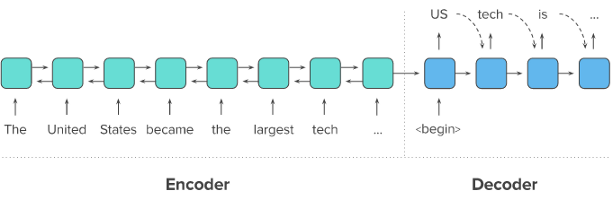

● dropna() 함수: 데이터 전처리 중, Null 값이 있을 경우에는 이를 데이터프레임에서 제거해주어야 한다. 이때 dropna() 함수를 사용하면 된다.

data.dropna(axis=0, inplace=True)

print('전체 샘플수 :', (len(data)))


★ 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

이미 알고 있는 내용이지만, 데이터 전처리를 어떤식으로 하느냐에 따라 모델의 성능이 달라진다. 이번 프로젝트 중에 그 많던 중복샘플들과 Null 값이 존재하는 샘플들은 제거되었고, 텍스트 정규화와 불용어 제거 과정을 거치게 되면서 깨끗한 데이터를 얻게 되었다. 이 외데도 데이터 전처리 과정은 많이 남아있고, 하면 할수록 데이터는 깨끗해진다.


★ 루브릭 평가 지표를 맞추기 위해 시도한 것들

● 데이터 수집하기

● 데이터 전처리하기 (추상적 요약)

● 어텐션 메커니즘 사용하기 (추상적 요약)

● 실제 결과와 요약문 비교하기 (추상적 요약)

● Summa을 이용해서 추출적 요약해보기

위 5가지 과정을 거쳐 평가 지표를 맞추었다. 추상적 요약을 하기 위한 과정 자체가 매우 길고, 어려웠던 것으로 기억에 남는다. 

★ 자기 다짐

seq2seq 모델, 어텐션 메커니즘 등 자연어 처리를 위해 꼭 알아야 하는 이론들이 많다. 지금은 익숙해졌을 뿐, 다 알지는 못한다. 언젠가 자연어 처리를 할 날이 또 올 것이므로, 여러 사이트를 방문하며 이해해야 할 필요가 있다. 앞서 말한 seq2seq 모델이 가장 알아야 하고, 알고 싶은 이론이다.